
# 1.Understanding Data

# 1.1 Data load

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
df = pd.read_csv('../input/depression-anxiety-stress-scales/DASS_data_21.02.19/data.csv', error_bad_lines = False, warn_bad_lines = False, sep=r'	')
codebook = open('../input/depression-anxiety-stress-scales/DASS_data_21.02.19/codebook.txt', 'r').read()



/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
import os
import time
import shap
import random
import xgboost
import numpy as np
import pandas as pd
from umap import UMAP
import networkx as nx
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import plotly.graph_objects as go
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss
from catboost import CatBoostClassifier
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.metrics import roc_curve, precision_recall_curve

import warnings; warnings.filterwarnings("ignore")

df


Q1A  Q1I    Q1E  Q2A  Q2I   Q2E  Q3A  Q3I    Q3E  Q4A  ...  screensize  \
0        4   28   3890    4   25  2122    2   16   1944    4  ...           1   
1        4    2   8118    1   36  2890    2   35   4777    3  ...           2   
2        3    7   5784    1   33  4373    4   41   3242    1  ...           2   
3        2   23   5081    3   11  6837    2   37   5521    1  ...           2   
4        2   36   3215    2   13  7731    3    5   4156    4  ...           2   
...    ...  ...    ...  ...  ...   ...  ...  ...    ...  ...  ...         ...   
39770    2   31   3287    1    5  2216    3   29   3895    2  ...           2   
39771    3   14   4792    4   41  2604    3   15   2668    4  ...           1   
39772    2    1  25147    1    4  4555    2   14   3388    1  ...           2   
39773    3   36   4286    1   34  2736    2   10   5968    2  ...           2   
39774    2   28  32251    1   22  3317    2    4  11734    1  ...           1   

       uniquenetworklocation  hand  religion  orientation  race  voted  \
0                          1     1        12            1    10      2   
1                          1     2         7            0    70      2   
2                          1     1         4            3    60      1   
3                          1     2         4            5    70      2   
4                          2     3        10            1    10      2   
...                      ...   ...       ...          ...   ...    ...   
39770                      1     1         2            4    60      2   
39771                      1     1        10            0    10      2   
39772                      1     1         7            1    30      1   
39773                      1     1         6            1    60      1   
39774                      1     1        10            1    10      1   

       married  familysize              major  
0            1           2                NaN  
1            1           4                NaN  
2            1           3                NaN  
3            1           5            biology  
4            1           4         Psychology  
...        ...         ...                ...  
39770        1           2                NaN  
39771        1           4         Mathematic  
39772        2           3   Computer Science  
39773        1           2            History  
39774        1           4  Cognitive Science  

[39775 rows x 172 columns]

# 1.2 Null Check

In [ ]:
df.isnull().sum()

Q1A               0
Q1I               0
Q1E               0
Q2A               0
Q2I               0
              ...  
race              0
voted             0
married           0
familysize        0
major         11403
Length: 172, dtype: int64

# 1.3 describe

In [ ]:
df.describe()

Q1A           Q1I           Q1E           Q2A           Q2I  \
count  39775.000000  39775.000000  3.977500e+04  39775.000000  39775.000000   
mean       2.619485     21.555977  6.970591e+03      2.172269     21.248070   
std        1.032117     12.133621  8.670513e+04      1.111563     12.125288   
min        1.000000      1.000000  1.800000e+02      1.000000      1.000000   
25%        2.000000     11.000000  2.664000e+03      1.000000     11.000000   
50%        3.000000     22.000000  3.609000e+03      2.000000     21.000000   
75%        4.000000     32.000000  5.358000e+03      3.000000     32.000000   
max        4.000000     42.000000  1.210228e+07      4.000000     42.000000   

                Q2E           Q3A           Q3I           Q3E           Q4A  \
count  3.977500e+04  39775.000000  39775.000000  3.977500e+04  39775.000000   
mean   5.332376e+03      2.226097     21.583004  7.426446e+03      1.950170   
std    2.651361e+04      1.038526     12.115637  1.587024e+05      1.042218   
min    1.760000e+02      1.000000      1.000000 -1.081400e+04      1.000000   
25%    2.477000e+03      1.000000     11.000000  2.857000e+03      1.000000   
50%    3.511000e+03      2.000000     22.000000  3.898000e+03      2.000000   
75%    5.216000e+03      3.000000     32.000000  5.766000e+03      3.000000   
max    2.161057e+06      4.000000     42.000000  2.858269e+07      4.000000   

       ...           age    screensize  uniquenetworklocation         hand  \
count  ...  39775.000000  39775.000000           39775.000000  39775.00000   
mean   ...     23.612168      1.274519               1.200025      1.13516   
std    ...     21.581722      0.446277               0.400024      0.40030   
min    ...     13.000000      1.000000               1.000000      0.00000   
25%    ...     18.000000      1.000000               1.000000      1.00000   
50%    ...     21.000000      1.000000               1.000000      1.00000   
75%    ...     25.000000      2.000000               1.000000      1.00000   
max    ...   1998.000000      2.000000               2.000000      3.00000   

           religion   orientation          race         voted       married  \
count  39775.000000  39775.000000  39775.000000  39775.000000  39775.000000   
mean       7.555852      1.642992     31.312885      1.705795      1.159547   
std        3.554395      1.351362     25.871272      0.473388      0.445882   
min        0.000000      0.000000     10.000000      0.000000      0.000000   
25%        4.000000      1.000000     10.000000      1.000000      1.000000   
50%       10.000000      1.000000     10.000000      2.000000      1.000000   
75%       10.000000      2.000000     60.000000      2.000000      1.000000   
max       12.000000      5.000000     70.000000      2.000000      3.000000   

         familysize  
count  39775.000000  
mean       3.510270  
std        2.141518  
min        0.000000  
25%        2.000000  
50%        3.000000  
75%        4.000000  
max      133.000000  

[8 rows x 170 columns]

In [ ]:
df.describe().T.style.background_gradient(cmap = 'Greens')
#A= answer (평가),E= time to estimate (점수 메기는데에 걸린 시간), I= location of question 질문의 위치
#This response is stored in variable A (e.g. Q1A). 
#Also recorded was the time taken in milliseconds to answer that question (E) 
#and that question's position in the survey (I).
#앤서랑 타겟/테스트 검증 이렇게 세개로 나누고 모델 별로 다 돌려보기  

# 1.4 Visualization

In [ ]:
df.corr().style.background_gradient(cmap = 'Greens')
#A=평가,E=점수 메기는데에 걸린 시간, I=참가자 포지션 
#S (Stress) Q1, 6, 8, 11, 12, 14, 18
#target= ['Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A']
         #'upsetbyt' 'over_react' 'd_relax' 'upset_easily''impatient''touchy'    

# 1.5 Correlation

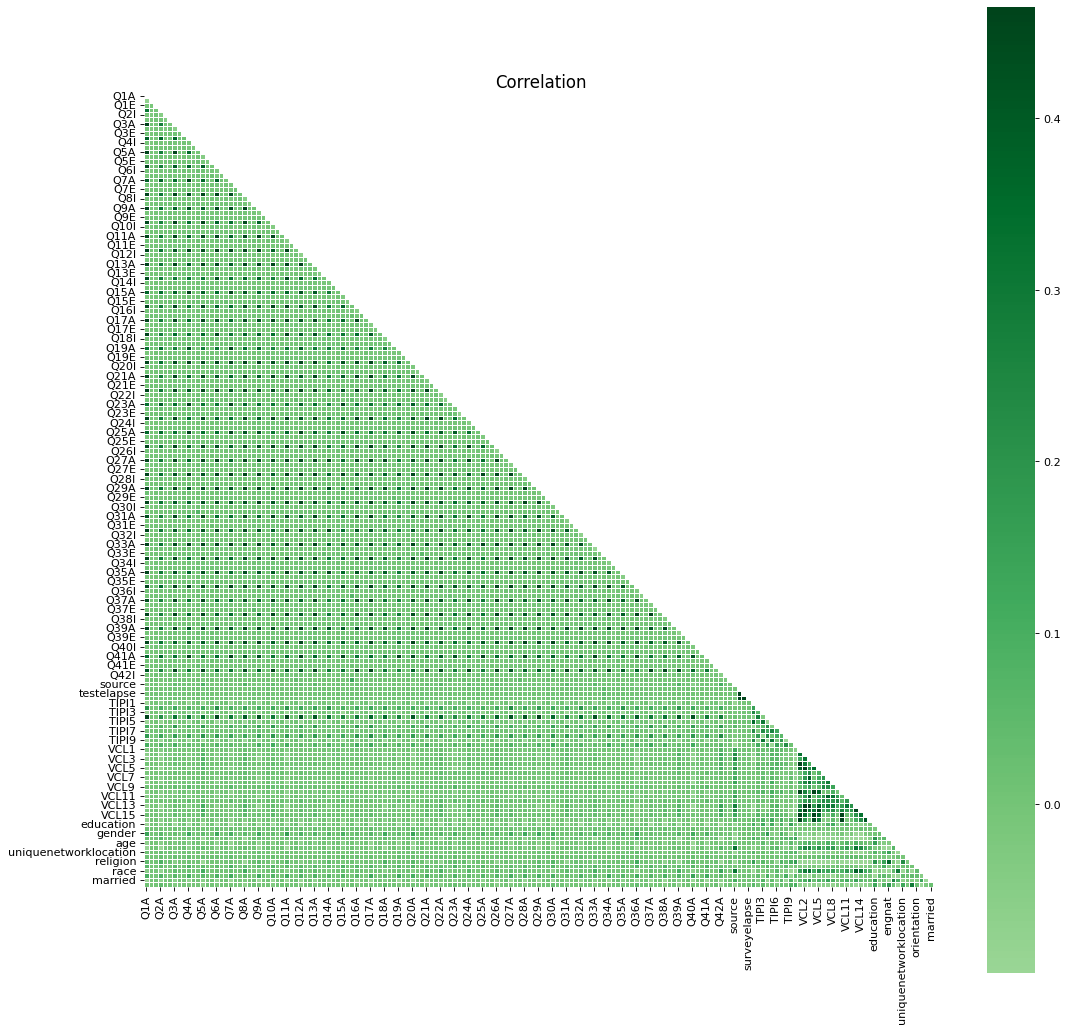

In [ ]:
plt.figure(figsize=(16,16),dpi=80)
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap = 'Greens', robust=True, center=0, square=True, linewidths=.5)
plt.title('Correlation', fontsize=15)
plt.show()

# 1.5 _ X / Y 의 파악 

![image.png](attachment:69cfc433-3631-426f-9f7e-42f9fb142836.png)

# 2. Data preparation 

# 2.1 Feature engineering +EDA... etc

In [ ]:
#major 지우고 (범주형 오버),상관 없는 피쳐 지우고, 각 타겟에 맞는 특성 피쳐
#depression으로 모델 일단 구축 
dfd= df[['Q3A','Q5A','Q10A','Q13A','Q16A','Q17A','Q21A','Q24A','Q26A','Q31A','Q34A','Q37A','Q38A','Q42A',
         'TIPI1','TIPI2','TIPI3','TIPI4','TIPI5','TIPI6','TIPI7','TIPI8','TIPI9','TIPI10',
         'education','urban','gender','engnat','age','hand','religion','orientation','race','voted','married','familysize']]
#dfa= df[['Q2A','Q4A','Q7A','Q9A','Q12A','Q15A','Q19A','Q20A','Q23A','Q25A','Q28A','Q30A','Q36A','Q40A','Q41A','education','urban','gender','engnat','age','hand','religion','race','voted','married','familysize']]
#dfs= df[['Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A','Q22A','Q27A','Q29A','Q32A','Q33A','Q35A','Q39A','education','urban','gender','engnat','age','hand','religion','race','voted','married','familysize']]

#VCL 단어 표현력 테스트 합계  #() !이고 숫자 앞에는 =하나만 쓰나봐 
#if 'VCL6' 'VCL9' 'VCL12' 중에 하나라도 1이면 그 데이터 지워라 > 이건 어떻게할지 계속 고민하겠어  
dfd1=df.loc[(df['VCL6'] !=1)&(df['VCL9'] !=1)]
dfd=dfd1.loc[df['VCL12'] !=1]

dfd['VCL']=df['VCL1']+df['VCL2']+df['VCL3']+df['VCL4']+df['VCL5']+df['VCL7']+df['VCL8']+df['VCL10']+df['VCL11']+df['VCL13']+df['VCL14']+df['VCL15']+df['VCL16']
#dfa['VCL']=df['VCL1']+df['VCL2']+df['VCL3']+df['VCL4']+df['VCL5']+df['VCL7']+df['VCL8']+df['VCL10']+df['VCL11']+df['VCL13']+df['VCL14']+df['VCL15']+df['VCL16']
#dfs['VCL']=df['VCL1']+df['VCL2']+df['VCL3']+df['VCL4']+df['VCL5']+df['VCL7']+df['VCL8']+df['VCL10']+df['VCL11']+df['VCL13']+df['VCL14']+df['VCL15']+df['VCL16']

#depression_target 설정 
dfd['d_score']=df['Q3A']+df['Q5A']+df['Q10A']+df['Q13A']+df['Q16A']+df['Q17A']+df['Q21A']+df['Q24A']+df['Q26A']+df['Q31A']+df['Q34A']+df['Q38A']+df['Q42A']
dfd.head(20)
#dfd['d_score']>=21
dfd= dfd[['d_score','VCL','TIPI1','TIPI2','TIPI3','TIPI4','TIPI5','TIPI6','TIPI7','TIPI8','TIPI9','TIPI10',
         'education','urban','gender','engnat','age','hand','religion','orientation','race','voted','married','familysize','screensize']]
dfd

d_score  VCL  TIPI1  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  TIPI7  TIPI8  \
0           40    8      1      5      7      7      7      7      7      5   
1           34    8      6      5      4      7      5      4      7      7   
2           49    7      2      5      2      2      5      6      5      5   
3           28    7      1      1      7      4      6      4      6      1   
4           43   10      2      5      3      6      5      5      5      6   
...        ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
39769       27    9      6      5      4      5      6      3      5      2   
39770       46    9      2      2      3      5      6      5      5      3   
39772       17    6      6      6      7      5      6      3      6      1   
39773       29   11      1      6      5      7      3      5      3      5   
39774       39    6      6      2      3      5      6      3      5      5   

       ...  engnat  age  hand  religion  orientation  race  voted  married  \
0      ...       2   16     1        12            1    10      2        1   
1      ...       1   16     2         7            0    70      2        1   
2      ...       2   17     1         4            3    60      1        1   
3      ...       1   13     2         4            5    70      2        1   
4      ...       2   19     3        10            1    10      2        1   
...    ...     ...  ...   ...       ...          ...   ...    ...      ...   
39769  ...       1   16     1         1            1    70      2        1   
39770  ...       1   16     1         2            4    60      2        1   
39772  ...       1   48     1         7            1    30      1        2   
39773  ...       1   20     1         6            1    60      1        1   
39774  ...       2   26     1        10            1    10      1        1   

       familysize  screensize  
0               2           1  
1               4           2  
2               3           2  
3               5           2  
4               4           2  
...           ...         ...  
39769           3           2  
39770           2           2  
39772           3           2  
39773           2           2  
39774           4           1  

[34583 rows x 25 columns]

In [ ]:
dfd[['VCL','d_score']].groupby(['VCL'],as_index=False).mean().sort_values(by='d_score',ascending=False)

VCL    d_score
0     0  33.915612
9     9  33.341935
10   10  33.153240
8     8  33.097194
3     3  32.580469
5     5  32.549097
6     6  32.408409
4     4  32.345274
7     7  32.262460
11   11  32.196944
1     1  31.571633
2     2  30.627013
13   13  30.510112
12   12  30.290824

In [ ]:
#!
dfd[['education','d_score']].groupby(['education'],as_index=False).mean().sort_values(by='d_score',ascending=False)

education    d_score
1          1  35.968722
2          2  33.779442
0          0  32.880562
3          3  31.352902
4          4  29.801964

In [ ]:
dfd[['urban','d_score']].groupby(['urban'],as_index=False).mean().sort_values(by='d_score',ascending=False)

urban    d_score
0      0  34.066860
3      3  32.866424
2      2  32.262237
1      1  32.201048

In [ ]:
#!!!
dfd[['TIPI2','d_score']].groupby(['TIPI2'],as_index=False).mean().sort_values(by='d_score',ascending=False)

TIPI2    d_score
7      7  37.667511
6      6  34.191972
0      0  32.627561
4      4  32.572472
5      5  32.254826
3      3  31.196813
2      2  30.617698
1      1  29.627099

In [ ]:
#!!! de
dfd[['TIPI3','d_score']].groupby(['TIPI3'],as_index=False).mean().sort_values(by='d_score',ascending=False)

TIPI3    d_score
1      1  40.018672
2      2  36.660408
3      3  34.665147
4      4  34.324173
0      0  32.278810
5      5  32.097409
7      7  30.159272
6      6  29.957624

In [ ]:
#!!!
dfd[['TIPI4','d_score']].groupby(['TIPI4'],as_index=False).mean().sort_values(by='d_score',ascending=False)

TIPI4    d_score
7      7  39.300920
6      6  34.062813
0      0  30.453271
5      5  29.465266
4      4  27.442942
3      3  26.854442
2      2  24.880918
1      1  23.606471

In [ ]:
dfd[['age','d_score']].groupby(['age'],as_index=False).mean().sort_values(by='d_score',ascending=False)

age  d_score
70    99     52.0
75  1993     51.0
76  1996     48.0
72   117     41.0
74  1991     39.0
..   ...      ...
69    89     21.0
73   223     18.0
77  1998     16.0
63    76     15.0
64    77     13.5

[78 rows x 2 columns]

In [ ]:
dfd[['race','d_score']].groupby(['race'],as_index=False).mean().sort_values(by='d_score',ascending=False)

race    d_score
4    50  35.458333
1    20  34.863158
3    40  33.846154
5    60  33.811912
2    30  33.000000
6    70  32.515030
0    10  31.972983

In [ ]:
#kaggle task NOPE  xx
dfd[['screensize','d_score']].groupby(['screensize'],as_index=False).mean().sort_values(by='d_score',ascending=False)

screensize    d_score
0           1  32.647896
1           2  32.238042

In [ ]:
dfd=dfd.loc[(dfd['age']>0)&(dfd['age']<90)]

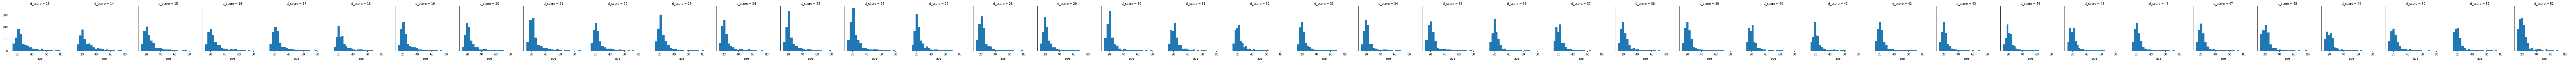

In [ ]:
g = sns.FacetGrid(dfd, col='d_score')
g.map(plt.hist, 'age', bins=20)

In [ ]:
dfd[['age','d_score']].groupby(['age'],as_index=False).mean().sort_values(by='d_score',ascending=False)

age    d_score
1    14  37.885180
57   70  37.777778
0    13  37.661836
2    15  36.305626
3    16  35.495000
..  ...        ...
62   75  22.125000
61   74  22.000000
69   89  21.000000
63   76  15.000000
64   77  13.500000

[70 rows x 2 columns]

In [ ]:
dfd['AgeBand'] = pd.cut(dfd['age'], 4)
dfd[['AgeBand','d_score']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand    d_score
0  (12.924, 32.0]  32.901911
1    (32.0, 51.0]  29.364255
2    (51.0, 70.0]  29.409786
3    (70.0, 89.0]  25.155556

In [ ]:
dfd['AgeBand']=0
dfd.loc[(dfd['age']>12) & (dfd['age']<= 32),'AgeBand'] = 3
dfd.loc[(dfd['age']>32) & (dfd['age']<= 51),'AgeBand'] = 2
dfd.loc[(dfd['age']>51) & (dfd['age']<= 70),'AgeBand'] = 1
dfd.loc[dfd['age']>70,'AgeBand']=0
dfd.head()

d_score  VCL  TIPI1  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  TIPI7  TIPI8  ...  \
0       40    8      1      5      7      7      7      7      7      5  ...   
1       34    8      6      5      4      7      5      4      7      7  ...   
2       49    7      2      5      2      2      5      6      5      5  ...   
3       28    7      1      1      7      4      6      4      6      1  ...   
4       43   10      2      5      3      6      5      5      5      6  ...   

   age  hand  religion  orientation  race  voted  married  familysize  \
0   16     1        12            1    10      2        1           2   
1   16     2         7            0    70      2        1           4   
2   17     1         4            3    60      1        1           3   
3   13     2         4            5    70      2        1           5   
4   19     3        10            1    10      2        1           4   

   screensize  AgeBand  
0           1        3  
1           2        3  
2           2        3  
3           2        3  
4           2        3  

[5 rows x 26 columns]

In [ ]:
#personality 점수 높을수록 우울 업업
dfd['personality']=dfd['TIPI2']+dfd['TIPI4']+dfd['TIPI6']+dfd['TIPI8']+dfd['TIPI10']-dfd['TIPI1']-dfd['TIPI3']-dfd['TIPI5']-dfd['TIPI7']-dfd['TIPI9']

# target 설정 

In [ ]:
#target은'd_score'
#dfd['d_score']>=21
dfd['d_severe']=0
dfd.loc[(dfd['d_score']<21),'d_severe']=0
dfd.loc[(dfd['d_score']>=21),'d_severe']=1
dfd.head()

d_score  VCL  TIPI1  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  TIPI7  TIPI8  ...  \
0       40    8      1      5      7      7      7      7      7      5  ...   
1       34    8      6      5      4      7      5      4      7      7  ...   
2       49    7      2      5      2      2      5      6      5      5  ...   
3       28    7      1      1      7      4      6      4      6      1  ...   
4       43   10      2      5      3      6      5      5      5      6  ...   

   religion  orientation  race  voted  married  familysize  screensize  \
0        12            1    10      2        1           2           1   
1         7            0    70      2        1           4           2   
2         4            3    60      1        1           3           2   
3         4            5    70      2        1           5           2   
4        10            1    10      2        1           4           2   

   AgeBand  personality  d_severe  
0        3            2         1  
1        3            5         1  
2        3            3         1  
3        3          -15         1  
4        3            7         1  

[5 rows x 28 columns]

In [ ]:
dfd.d_severe.value_counts().to_frame().style.background_gradient(cmap='summer')

In [ ]:
dfd= dfd[['d_severe','AgeBand','VCL','personality','screensize',
         'education','urban','gender','engnat','age','hand','religion','orientation','race','voted','married','familysize']]
dfd

d_severe  AgeBand  VCL  personality  screensize  education  urban  \
0             1        3    8            2           1          2      3   
1             1        3    8            5           2          2      3   
2             1        3    7            3           2          2      3   
3             1        3    7          -15           2          1      3   
4             1        3   10            7           2          3      2   
...         ...      ...  ...          ...         ...        ...    ...   
39769         1        3    9           -4           2          1      2   
39770         1        3    9            2           2          2      2   
39772         0        2    6          -11           2          3      2   
39773         1        3   11           12           2          3      2   
39774         1        3    6           -4           1          3      3   

       gender  engnat  age  hand  religion  orientation  race  voted  married  \
0           2       2   16     1        12            1    10      2        1   
1           2       1   16     2         7            0    70      2        1   
2           2       2   17     1         4            3    60      1        1   
3           2       1   13     2         4            5    70      2        1   
4           2       2   19     3        10            1    10      2        1   
...       ...     ...  ...   ...       ...          ...   ...    ...      ...   
39769       2       1   16     1         1            1    70      2        1   
39770       1       1   16     1         2            4    60      2        1   
39772       2       1   48     1         7            1    30      1        2   
39773       2       1   20     1         6            1    60      1        1   
39774       2       2   26     1        10            1    10      1        1   

       familysize  
0               2  
1               4  
2               3  
3               5  
4               4  
...           ...  
39769           3  
39770           2  
39772           3  
39773           2  
39774           4  

[34575 rows x 17 columns]

# baseline

In [ ]:
#from sklearn import datasets, linear_model
#from sklearn.model_selection import train_test_split

train=dfd.sample(frac=0.75,random_state=1)
test=dfd.drop(train.index)
train.head()

d_severe  AgeBand  VCL  personality  screensize  education  urban  \
10121         1        3    6            7           1          3      1   
37803         1        3    4           -1           1          2      1   
21867         1        3    6            3           1          3      3   
33070         1        3    8          -14           1          4      3   
5476          0        3    6           -1           1          2      3   

       gender  engnat  age  hand  religion  orientation  race  voted  married  \
10121       2       2   21     1        12            1    10      2        1   
37803       2       2   20     1        10            5    10      2        1   
21867       2       2   28     1        10            1    70      1        2   
33070       2       2   22     1        10            1    70      2        1   
5476        2       2   19     1        10            0    10      2        1   

       familysize  
10121           2  
37803           6  
21867           4  
33070           3  
5476            4

In [ ]:
len(train),len(test)

(25931, 8644)

In [ ]:
train['d_severe'].mean()

0.8148933708688443

In [ ]:
#label 정의 
target='d_severe'
y_train=train[target]
y_test=test[target]

In [ ]:
#dscore mean으로 예측 (기준모델)
predict=y_train.mean()
predict

0.8148933708688443

In [ ]:
#기준모델로 훈련 에러 (MAE 계산)#나중에뜯어보기
from sklearn.metrics import mean_absolute_error
y_pred=[predict]*len(y_train)
mae=mean_absolute_error(y_train,y_pred)
print(f'훈련에러:{mae:.2f}')


훈련에러:0.30


In [ ]:
# 테스트 에러(MAE)
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 0.30


In [ ]:
#(predict,)*len(y_train) #튜플과 리스트의 차이 

# 2. 2  Data Split 

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)


train.shape, val.shape, test.shape

((20744, 17), (5187, 17), (8644, 17))

# 3. Modeling 

In [ ]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<function matplotlib.pyplot.show(close=None, block=None)>

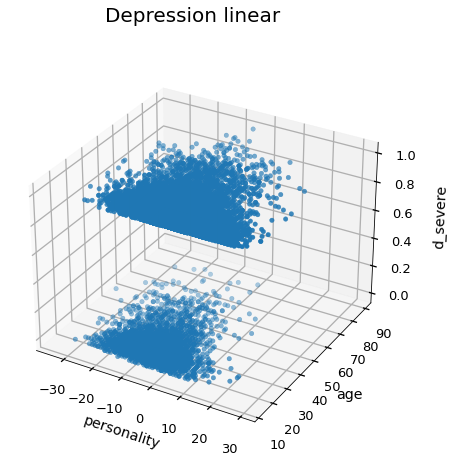

In [ ]:
#다중 선형 회귀 그래프로 확인 
from matplotlib import style
import matplotlib.pyplot as plt
style.use('seaborn-talk')
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(train['personality'],train['age'],train['d_severe'])
ax.set_xlabel('personality', labelpad=12)
ax.set_ylabel('age', labelpad=10)
ax.set_zlabel('d_severe', labelpad=20)
plt.suptitle('Depression linear',fontsize=20)
plt.show


In [ ]:
#다중모델 학습 특성
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_train=train[features]
X_test[features]
#fit
model.fit(X_train,y_train)
y_pred=model.predict(X_train)
mae=mean_absolute_error(y_train,y_pred)
print(f'훈련에러:{mae:2f}')
#test
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
print(f'테스트 에러:{mae:2f}')

훈련에러:0.268773
테스트 에러:0.268884


In [ ]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=1, criterion='entropy')
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))


검증 정확도:  0.7501445922498554


In [ ]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.8282244071717756


In [ ]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    RandomForestClassifier(min_samples_leaf=10, n_jobs=-1, random_state=10, oob_score=True)
)

pipe.fit(X_train, y_train)
print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

훈련 정확도 0.8560065561126109
검증 정확도 0.8370927318295739


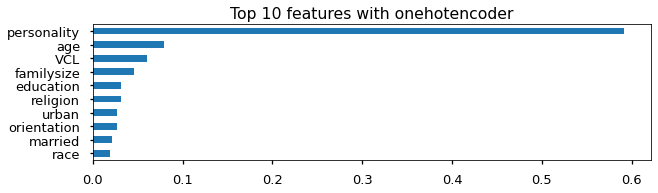

In [ ]:
import matplotlib.pyplot as plt

# 특성 중요도(onehot)
rf = pipe.named_steps['randomforestclassifier']
colnames = pipe.named_steps['onehotencoder'].get_feature_names()
importances = pd.Series(rf.feature_importances_, colnames)

n = 10
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with onehotencoder')
importances.sort_values()[-n:].plot.barh();

In [ ]:
dfd= dfd[['d_severe','AgeBand','VCL','personality','education','urban','age','religion','orientation','familysize']]
print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

훈련 정확도 0.8560065561126109
검증 정확도 0.8370927318295739


In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8159416936603424

In [ ]:
from category_encoders import TargetEncoder
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    RandomForestClassifier(min_samples_leaf=10,max_depth =10, random_state=10, oob_score=True)
)
from sklearn.model_selection import cross_val_score
k = 3

scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE for {k} folds:', -scores)

pipe.fit(X_train, y_train)
print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

MAE for 3 folds: [0.17353579 0.1670282  0.16632919]
훈련 정확도 0.8487273428461242
검증 정확도 0.8382494698284172


In [ ]:
from sklearn.metrics import classification_report
# train 학습, 검증셋 정확도
pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

print(classification_report(y_val, pipe.predict(X_val)))

검증 정확도 0.8382494698284172
              precision    recall  f1-score   support

           0       0.67      0.25      0.37       960
           1       0.85      0.97      0.91      4227

    accuracy                           0.84      5187
   macro avg       0.76      0.61      0.64      5187
weighted avg       0.82      0.84      0.81      5187



In [ ]:
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))

검증 정확도:  0.8382494698284172
              precision    recall  f1-score   support

           0       0.25      0.67      0.37       363
           1       0.97      0.85      0.91      4824

    accuracy                           0.84      5187
   macro avg       0.61      0.76      0.64      5187
weighted avg       0.92      0.84      0.87      5187



In [ ]:
from xgboost import XGBRegressor
LR = LogisticRegression(max_iter=1000,C=0.175,random_state=42)
LR.fit(X_train,y_train)
lr_training_accuracy = LR.score(X_train, y_train)
lr_predictions = LR.predict(X_test)
lr_predictions = [int(x) for x in lr_predictions]

xgboost = XGBRegressor(learning_rate=0.005,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

xgb = xgboost.fit(X_train,y_train)
xgb_training_accuracy = xgb.score(X_train,y_train)
xgb_predictions = xgb.predict(X_test)
xgb_predictions = [round(x) for x in xgb_predictions]

print("Logistic Regression training accuracy: %.2f%%" % (lr_training_accuracy * 100.0))
print("\nXGB training accuracy: %.2f%%" % (xgb_training_accuracy * 100.0))

Logistic Regression training accuracy: 83.39%

XGB training accuracy: 26.26%


In [ ]:
from category_encoders import OneHotEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(
    # TargetEncoder: 범주형 변수 인코더로, 타겟값을 특성의 범주별로 평균내어 그 값으로 인코딩
    TargetEncoder(min_samples_leaf=1, smoothing=1), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(max_depth = 10, n_jobs=-1, random_state=2)
)

k = 3

scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [0.24625579 0.24089621 0.23960946]


In [ ]:
#features
#dfd= df[['Q3A','Q5A','Q10A','Q13A','Q16A','Q17A','Q21A','Q24A','Q26A','Q31A','Q34A','Q37A','Q38A','Q42A','education','urban','gender','engnat','age','hand','religion','race','voted','married','familysize']]
#dfa= df[['Q2A','Q4A','Q7A','Q9A','Q12A','Q15A','Q19A','Q20A','Q23A','Q25A','Q28A','Q30A','Q36A','Q40A','Q41A','education','urban','gender','engnat','age','hand','religion','race','voted','married','familysize']]
#dfs= df[['Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A','Q22A','Q27A','Q29A','Q32A','Q33A','Q35A','Q39A','education','urban','gender','engnat','age','hand','religion','race','voted','married','familysize']]

#점수 내기 
#d=df['Q3A']+df['Q5A']+df['Q10A']+df['Q13A']+df['Q16A']+df['Q17A']+df['Q21A']+df['Q24A']+df['Q26A']+df['Q31A']+df['Q37A']+df['Q38A']+df['Q42A']
#a=df['Q2A']+df['Q4A']+df['Q7A']+df['Q9A']+df['Q12A']+df['Q15A']+df['Q19A']+df['Q20A']+df['Q23A']+df['Q25A']+df['Q28A']+df['Q30A']+df['Q36A']+df['Q40A']+df['Q41A']
#s=df['Q1A']+df['Q6A']+df['Q8A']+df['Q11A']+df['Q12A']+df['Q14A']+df['Q18A']+df['Q22A']+df['Q27A']+df['Q29A']+df['Q32A']+df['Q33A']+df['Q35A']+df['Q39A']

